In [64]:
from keras.datasets import reuters

In [65]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [66]:
word_index = reuters.get_word_index() #word_index is a dict mapping words to integer (https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb_word_index.json)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(train_data[0])
news = ""
for i in train_data[0]:
    word = reverse_word_index.get(i-3, "?")
    news += f" {word}"

print(news)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [67]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))

    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [68]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [69]:
print(x_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [71]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [72]:
# sepearte validation data

val_x = x_train[:1000]
val_y = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [73]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(val_x, val_y)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3838 - loss: 3.2506 - val_accuracy: 0.6080 - val_loss: 1.8986
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6547 - loss: 1.6908 - val_accuracy: 0.6830 - val_loss: 1.3989
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7234 - loss: 1.2398 - val_accuracy: 0.7430 - val_loss: 1.1773
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7931 - loss: 0.9698 - val_accuracy: 0.7640 - val_loss: 1.0683
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8169 - loss: 0.8199 - val_accuracy: 0.7900 - val_loss: 0.9913
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8579 - loss: 0.6730 - val_accuracy: 0.7950 - val_loss: 0.9389
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8826 - loss: 0.5672 - val_accuracy: 0.8040 - val_loss: 0.9007
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9020 - loss: 0.4688 - val_accuracy: 0.8110 - v

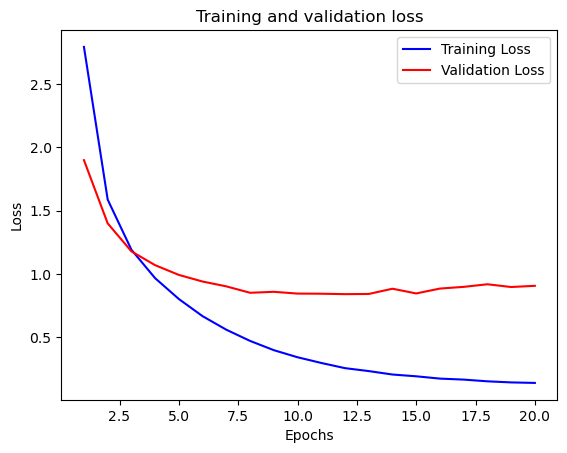

In [74]:
import matplotlib.pyplot as plt
history = history.history

loss = history["loss"]
validation_loss = history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "b", label="Training Loss") #bo blue dot
plt.plot(epochs, validation_loss, "r", label="Validation Loss") #b for solid blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

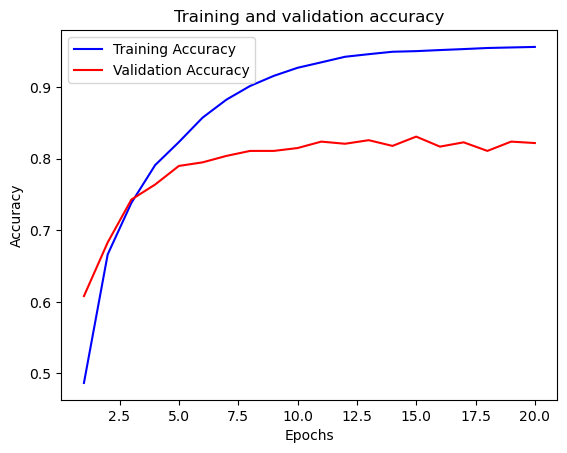

In [75]:
accuracy = history["accuracy"]
validation_accuracy = history["val_accuracy"]

plt.plot(epochs, accuracy, "b", label="Training Accuracy") #bo blue dot
plt.plot(epochs, validation_accuracy, "r", label="Validation Accuracy") #b for solid blue line
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [76]:
# the model begins to overfit after 9 epochs. Lets train the model for 9 epochs
# and evaluate it on test set
model1 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model1.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model1.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)

results = model1.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3987 - loss: 3.1396
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6726 - loss: 1.5447
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7454 - loss: 1.1519
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7948 - loss: 0.9359
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8317 - loss: 0.7928
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8628 - loss: 0.6517
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8901 - loss: 0.5177
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9034 - loss: 0.4503
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9214 - loss: 0.3757
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7839 - loss: 0.9216


[0.9447393417358398, 0.7809438705444336]